Author: Ryan Timbrook (RTIMBROO)  
DATE: 12/3/2019 <br>
Topic: 

## 1. Objective:
-----------------------------------------------------------------------------------------------------

In [9]:
import pandas as pd
import numpy as np
import json
import os
from os import path
import fnmatch
import io
import re
import string
from datetime import date
from datetime import time
from datetime import datetime

import seaborn as sns

In [2]:
# custome python packages
import rtimbroo_utils as br  

In [3]:
# set global properties
notebook_file_name = 'train_tweets_master'
report_file_name = 'train_tweets_master'
app_name = 'train_tweets_master'
log_level = 10 # 10-DEBUG, 20-INFO, 30-WARNING, 40-ERROR, 50-CRITICAL

# setup working directory structure
# set global properties
dataDir = './data/train'
logOutDir = './logs'
imageDir = './images'

# create base output directories if they don't exist
if not os.path.exists(logOutDir): os.mkdir(logOutDir)
if not os.path.exists(imageDir): os.mkdir(imageDir)
if not os.path.exists(dataDir): os.mkdir(dataDir)

In [4]:
# get a logger for troubleshooting / data exploration
logger = br.getFileLogger(logOutDir+'/',app_name,level=log_level)

In [5]:
nfl_tweets_master = pd.read_csv(f'{dataDir}/nfl_tweets_master.csv', encoding='latin')
train_tweets_master = pd.read_csv(f'{dataDir}/train_tweets_master.csv', encoding='latin')


In [6]:
logger.info(f'{nfl_tweets_master.shape}')
nfl_tweets_master.head()

(10148, 13)


,id,created_at,date,time,user,text,favorite_count,year,month,day_of_month,day_of_week,nfl_type,nfl_schedule_wk
0,1200925257407827968,Sat Nov 30 23:51:08 +0000 2019,2019-11-30,23:51:08,JT_Evans97,You mean the same fan experts who could see La...,28503.0,2019,11,30,5,player,13
1,1200924548700495872,Sat Nov 30 23:48:19 +0000 2019,2019-11-30,23:48:19,MigiziLaFern,Deshaun Watson or Sam Darnold? WhoShouldIStart,161.0,2019,11,30,5,player,13
2,1200922963375280129,Sat Nov 30 23:42:01 +0000 2019,2019-11-30,23:42:01,TifdanyBrooks,RT Top 5 current NFL quarterbacks 1. Tom Bra...,10198.0,2019,11,30,5,player,13
3,1200922228168237057,Sat Nov 30 23:39:05 +0000 2019,2019-11-30,23:39:05,Schlarb23,A NFL team I love: Browns A NFL team I like: P...,1376.0,2019,11,30,5,player,13
4,1200922016636948481,Sat Nov 30 23:38:15 +0000 2019,2019-11-30,23:38:15,JoeZo88,Deshaun Watson,85828.0,2019,11,30,5,player,13


# 1. Create Training / Test Sets from NFL Tweet Data

## PLAYER

In [7]:
players_df = nfl_tweets_master[nfl_tweets_master['nfl_type'] == 'player']
players_df.shape

(4933, 13)

In [11]:
np.unique(players_df['nfl_schedule_wk'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

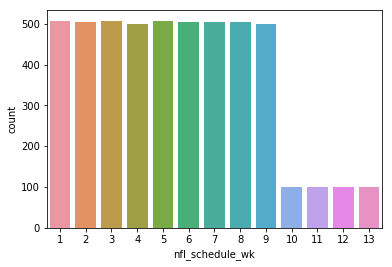

In [14]:
sns.countplot(x='nfl_schedule_wk', data=players_df);

In [25]:
# get a random sampling of the dataset for training / hold out testing
train_players = players_df.sample(frac=0.7, replace=False, random_state=42)
test_players = pd.concat([players_df,train_players]).loc[players_df.index.symmetric_difference(train_players.index)]

In [26]:
logger.info(f'train_players.shape: {train_players.shape}')
logger.info(f'players_df.shape: {players_df.shape}')
logger.info(f'test_players.shape: {test_players.shape}')

train_players.shape: (3453, 13)
players_df.shape: (4933, 13)
test_players.shape: (1480, 13)


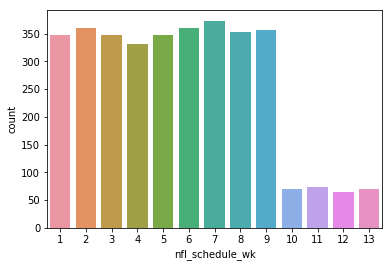

In [20]:
sns.countplot(x='nfl_schedule_wk', data=train_players);

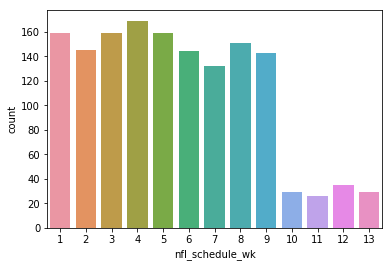

In [27]:
sns.countplot(x='nfl_schedule_wk', data=test_players);

### COACH

In [28]:
coach_df = nfl_tweets_master[nfl_tweets_master['nfl_type'] == 'coach']
coach_df.shape

(289, 13)

In [29]:
np.unique(coach_df['nfl_schedule_wk'])

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

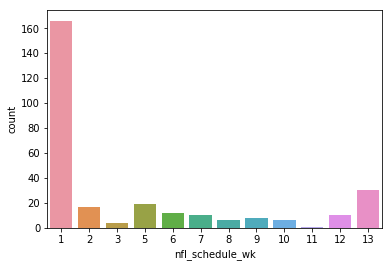

In [30]:
sns.countplot(x='nfl_schedule_wk', data=coach_df);

In [31]:
# get a random sampling of the dataset for training / hold out testing
train_coaches = coach_df.sample(frac=0.7, replace=False, random_state=42)
test_coaches = pd.concat([coach_df,train_coaches]).loc[coach_df.index.symmetric_difference(train_coaches.index)]

In [32]:
logger.info(f'coach_df.shape: {coach_df.shape}')
logger.info(f'train_coaches.shape: {train_coaches.shape}')
logger.info(f'test_coaches.shape: {test_coaches.shape}')

coach_df.shape: (289, 13)
train_coaches.shape: (202, 13)
test_coaches.shape: (87, 13)


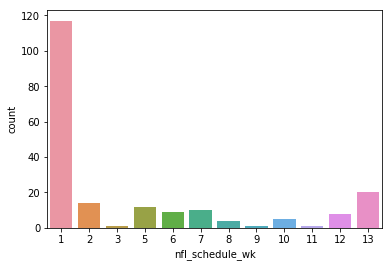

In [33]:
sns.countplot(x='nfl_schedule_wk', data=train_coaches);

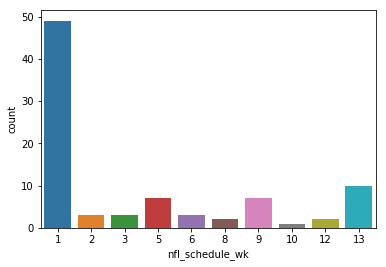

In [34]:
sns.countplot(x='nfl_schedule_wk', data=test_coaches);

### TEAM

In [35]:
team_df = nfl_tweets_master[nfl_tweets_master['nfl_type'] == 'team']
team_df.shape

(4926, 13)

In [36]:
np.unique(team_df['nfl_schedule_wk'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

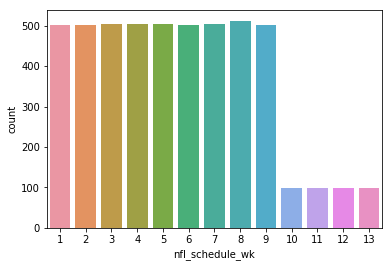

In [37]:
sns.countplot(x='nfl_schedule_wk', data=team_df);

In [38]:
# get a random sampling of the dataset for training / hold out testing
train_team = team_df.sample(frac=0.7, replace=False, random_state=42)
test_team = pd.concat([team_df,train_team]).loc[team_df.index.symmetric_difference(train_team.index)]

In [39]:
logger.info(f'team_df.shape: {team_df.shape}')
logger.info(f'train_team.shape: {train_team.shape}')
logger.info(f'test_team.shape: {test_team.shape}')

team_df.shape: (4926, 13)
train_team.shape: (3448, 13)
test_team.shape: (1478, 13)


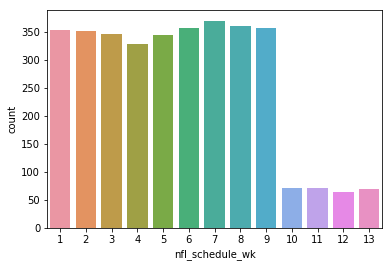

In [40]:
sns.countplot(x='nfl_schedule_wk', data=train_team);

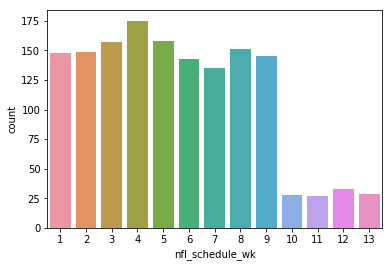

In [41]:
sns.countplot(x='nfl_schedule_wk', data=test_team);

### Subset train / test to key attributes
id and text

In [42]:
# training data frames
train_players = train_players[['id', 'text']]
train_team = train_team[['id', 'text']]
train_coaches = train_coaches[['id', 'text']]

# testing data frames
test_players = test_players[['id', 'text']]
test_team = test_team[['id', 'text']]
test_coaches = test_coaches[['id', 'text']]

# 2. Merge NFL Train / Test Subtypes

In [43]:
train_nfl_master_df = pd.DataFrame()

train_nfl_master_df = train_nfl_master_df.append(train_players, ignore_index=True)
train_nfl_master_df = train_nfl_master_df.append(train_team, ignore_index=True)
train_nfl_master_df = train_nfl_master_df.append(train_coaches, ignore_index=True)

In [44]:
test_nfl_master_df = pd.DataFrame()

test_nfl_master_df = test_nfl_master_df.append(test_players, ignore_index=True)
test_nfl_master_df = test_nfl_master_df.append(test_team, ignore_index=True)
test_nfl_master_df = test_nfl_master_df.append(test_coaches, ignore_index=True)

In [45]:
logger.info(f'train_nfl_master_df.shape: {train_nfl_master_df.shape}')
logger.info(f'test_nfl_master_df.shape: {test_nfl_master_df.shape}')

train_nfl_master_df.shape: (7103, 2)
test_nfl_master_df.shape: (3045, 2)


## Write New Training Data Set to File

In [46]:
train_nfl_master_df.to_csv(f'{dataDir}/train_nfl_master.csv', index=False)
test_nfl_master_df.to_csv(f'{dataDir}/test_nfl_master.csv', index=False)

In [47]:
# pull back together - this was to soon....
nfl_master2_df = pd.DataFrame()

nfl_master2_df = nfl_master2_df.append(train_nfl_master_df, ignore_index=True)
nfl_master2_df = nfl_master2_df.append(test_nfl_master_df, ignore_index=True)
logger.info(f'nfl_master2_df.shape: {nfl_master2_df.shape}')

nfl_master2_df.shape: (10148, 2)


In [48]:
nfl_master2_df.to_csv(f'{dataDir}/nfl_master2_df.csv', index=False)